# Basic Network Analysis

In [17]:
import matplotlib.pyplot as plt
import networkx as nx

In [3]:
users = [
    { "id": 0, "name": "Hero" },
    { "id": 1, "name": "Dunn" },
    { "id": 2, "name": "Sue" },
    { "id": 3, "name": "Chi" },
    { "id": 4, "name": "Thor" },
    { "id": 5, "name": "Clive" },
    { "id": 6, "name": "Hicks" },
    { "id": 7, "name": "Devin" },
    { "id": 8, "name": "Kate" },
    { "id": 9, "name": "Klein" }
]

friendships = [(0, 1), (0, 2), (1, 2), (1, 3), (2, 3), (3, 4),
               (4, 5), (5, 6), (5, 7), (6, 8), (7, 8), (8, 9)]

`Networkx` 라이브러리를 이용한 시각화

In [4]:

G = nx.Graph() # Create an empty graph with no nodes and no edges.

labeldict = {}

for user in users:
    labeldict[user['id']] = user['name']

for i, j in friendships:
    G.add_edge(i, j)

nx.draw(G, with_labels=True, font_weight='bold')
plt.show()

/Users/yong/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


<Figure size 640x480 with 1 Axes>

In [5]:
len(G), G.number_of_nodes(), G.number_of_edges()

(10, 10, 12)

In [6]:
nx.has_path(G, 1, 7), nx.shortest_path(G, 1, 7)

(True, [1, 3, 4, 5, 7])

In [7]:
3 in G.neighbors(1), 4 in G.neighbors(1), G.neighbors(1)

(True, False, <dict_keyiterator at 0xa1c18dd68>)

In [8]:
[n for n in G.neighbors(1)]

[0, 2, 3]

In [9]:
nx.cliques_containing_node(G, 1)

[[1, 2, 0], [1, 2, 3]]

무방향성 그래프의 노드 집합 중에서 모든 노드끼리 간선이 존재하면 그 노드 집합을 클리크(clique)라고 한다. 만약 클리크에 포함된 노드에 인접한 다른 노드를 추가하면 클리크가 아니게 되는 것을 최대클리크(maximal clique)라고 한다.

In [10]:
[c for c in nx.enumerate_all_cliques(G)]

[[0],
 [1],
 [2],
 [3],
 [4],
 [5],
 [6],
 [7],
 [8],
 [9],
 [0, 1],
 [0, 2],
 [1, 2],
 [1, 3],
 [2, 3],
 [3, 4],
 [4, 5],
 [5, 6],
 [5, 7],
 [6, 8],
 [7, 8],
 [8, 9],
 [0, 1, 2],
 [1, 2, 3]]

In [11]:
[c for c in nx.find_cliques(G)]

[[1, 2, 0], [1, 2, 3], [4, 3], [4, 5], [5, 6], [5, 7], [6, 8], [7, 8], [8, 9]]

# 연결 중심성 (Degree Centrality)

In [14]:
# users에 친구목록 추가

for user in users:
    user['friends'] = []
    
for i, j in friendships:
    users[i]['friends'].append(users[j]) # j를 i의 친구로 추가
    users[j]['friends'].append(users[i]) # i를 j의 친구로 추가

In [107]:
# 총 친구 관계 수 구하기

def number_of_friends(user):
    return len(user['friends'])

total_connections = sum(number_of_friends(user)
                       for user in users)
total_connections

24

In [108]:
# 평균 친구 관계 수 구하기

num_users = len(users)
avg_connections = total_connections / num_users
avg_connections

2.4

In [109]:
# 친구가 많은 순서로 id 정렬하기

num_friends_by_id = [(user['id'], number_of_friends(user))
                     for user in users]

sorted(num_friends_by_id, key=lambda variables: variables[1], reverse=True)

[(1, 3),
 (2, 3),
 (3, 3),
 (5, 3),
 (8, 3),
 (0, 2),
 (4, 2),
 (6, 2),
 (7, 2),
 (9, 1)]

# 매개 중심성 (Betweenness Centrality)

매개 중심성 : 임의의 두 사람 사이의 최단 경로상에 빈번하게 등장하는 사람들이 큰 값을 가지는 지수

In [16]:
from collections import deque

In [ ]:
# Breadth-First Search Algorithm
def shortest_paths_from(from_user):

    # 특정 사용자(key)로부터 해당 사용자에 도달할 때까지의 모든 최단 경로(value)를 포함하는 dict
    shortest_paths_to = { from_user["id"] : [[]] }

    # 확인해야 하는 (prev_user, user) queue
    # 모든 (from_user, friend_of_from_user) 쌍으로 시작
    # deque는 double-ended queue로서 collections.deque는 list와 비슷
    frontier = deque((from_user, friend)
                     for friend in from_user["friends"])

    # queue가 빌 때까지 반복
    while frontier:

        prev_user, user = frontier.popleft() # popleft() : 왼쪽(앞쪽)에서 부터 차례로 제거와 반환
        user_id = user["id"] # 제거

        # queue에 사용자를 추가하는 방법을 고려해 보면
        # prev_user까지의 최단 경로를 이미 알고 있을 수도 있다
        paths_to_prev = shortest_paths_to[prev_user["id"]]
        paths_via_prev = [path + [user_id] for path in paths_to_prev]

        # 만약 최단 경로를 이미 알고 있다면
        old_paths_to_here = shortest_paths_to.get(user_id, []) # get() : key에 대응되는 value를 리턴

        # 지금까지의 최단 경로는 무었일까?
        if old_paths_to_here:
            min_path_length = len(old_paths_to_here[0])
        else:
            min_path_length = float('inf')

        # 최단 경로보다 길지 않는 새로운 경로만 list로 저장
        new_paths_to_here = [path_via_prev
                             for path_via_prev in paths_via_prev
                             if len(path_via_prev) <= min_path_length # 최단 경로보다 길지 않는 경로
                             and path_via_prev not in old_paths_to_here] # 새로운 경로

        shortest_paths_to[user_id] = old_paths_to_here + new_paths_to_here

        # 아직 한 번도 보지 못한 이웃을 frontier에 추가
        frontier.extend((user, friend)
                        for friend in user["friends"]
                        if friend["id"] not in shortest_paths_to)

    return shortest_paths_to

# Directed Graph

In [110]:
endorsements = [(0, 1), (1, 0), (0, 2), (2, 0), (1, 2), (2, 1), (1, 3),
                (2, 3), (3, 4), (5, 4), (5, 6), (7, 5), (6, 8), (8, 7), (8, 9)]

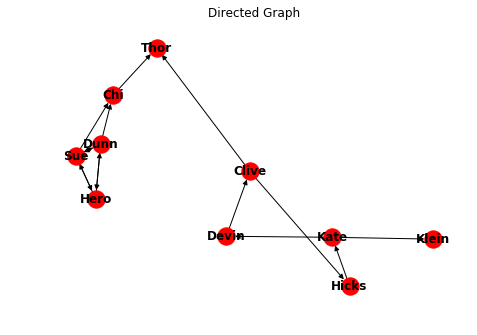

In [163]:
import matplotlib.pyplot as plt
import networkx as nx
G = nx.DiGraph()

labeldict = {}

for user in users: 
    labeldict[user['id']] = user['name']

for i, j in endorsements:
    G.add_edge(i, j)

nx.draw(G, labels=labeldict, with_labels=True, font_weight='bold')
plt.title('Directed Graph')
plt.show()

In [111]:
# users에 지지 정보 입력

for user in users:
    user['endorses'] =[]
    user['endorsed_by'] =[]

for source_id, target_id in endorsements:
    users[source_id]['endorses'].append(users[target_id])
    users[target_id]['endorsed_by'].append(users[source_id])

In [112]:
# 가장 지지를 많이 받은 순서로 출력

endorsements_by_id = [(user['id'], len(user['endorsed_by']))
                      for user in users]

sorted(endorsements_by_id, key=lambda endorse: endorse[1], reverse=True)

[(0, 2),
 (1, 2),
 (2, 2),
 (3, 2),
 (4, 2),
 (5, 1),
 (6, 1),
 (7, 1),
 (8, 1),
 (9, 1)]

In [113]:
def page_rank(users, damping = 0.85, num_iters = 100):    
    # 페이지 랭크를 모든 노드에 고르게 배당 -> 0.1씩 배당
    num_users = len(users)
    pr = {user['id'] : 1 / num_users for user in users} # {0:0.1, 1:0.1, ...}
    # 매 스텝마다 각 노드가 받는 적은 양의 pr
    base_pr = (1 - damping) / num_users # 0.015
    
    for __ in range(num_iters):
        next_pr = {user['id'] : base_pr for user in users} # {0:0.015, 1:0.015, ...}
        for user in users:
            # 페이지 링크를 외부로 향하는 링크에 배당
            links_pr = pr[user['id']] * damping # 0.085
            for endorsee in user['endorses']:
                # 
                next_pr[endorsee['id']] += links_pr / len(user['endorses'])
            pr = next_pr
    
    return pr

In [175]:
if __name__ == "__main__":

    print("PageRank")
    for user_id, pr in page_rank(users).items():
        print(user_id, pr)

PageRank
0 0.034072428093901756
1 0.04020032181750267
2 0.03783367015621559
3 0.034072428093901756
4 0.05033656387981649
5 0.027750000000000004
6 0.021375000000000005
7 0.029096718750000007
8 0.03316875000000001
9 0.029096718750000007
(0, 0.034072428093901756)
(1, 0.04020032181750267)
(2, 0.03783367015621559)
(3, 0.034072428093901756)
(4, 0.05033656387981649)
(5, 0.027750000000000004)
(6, 0.021375000000000005)
(7, 0.029096718750000007)
(8, 0.03316875000000001)
(9, 0.029096718750000007)


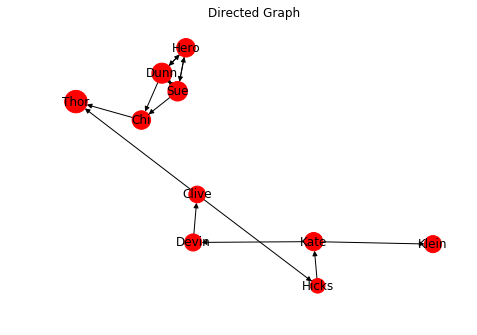

In [222]:
import matplotlib.pyplot as plt
import networkx as nx

G = nx.DiGraph()

labeldict = {}
for user in users: 
    labeldict[user['id']] = user['name']

for i, j in endorsements:
    G.add_edge(i, j)

    
node_pr = {}
for user_id, pr in page_rank(users).items():
    node_pr[user_id] = pr * 100

node_sizes = [v * 100 for v in node_pr.values()]

nx.draw(G, labels=labeldict, with_labels=True, node_size=node_sizes)
plt.title('Directed Graph')
plt.show()